In [1]:
import torch
import hiddenlayer as hl

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn

In [2]:
data = pd.read_csv("/mnt/g/onlinelessons/deep learning/dataset/bike-sharing-demand/bike_sharing.csv", index_col=0)

In [3]:
data.sample(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
322,18-11-2018,4,0,11,0,5,1,1,11.240847,13.63605,41.0000,11.291711,245,3147,3392
543,27-06-2019,3,1,6,0,3,1,1,28.597500,32.03960,36.0000,18.208925,1077,6258,7335
607,30-08-2019,3,1,8,0,4,1,1,28.973347,32.63895,59.0417,5.166819,1172,6541,7713
571,25-07-2019,3,1,7,0,3,1,1,29.690847,32.70270,45.0000,11.041600,1383,6790,8173
81,22-03-2018,2,0,3,0,2,1,1,18.108347,22.03210,62.4583,15.125250,460,2243,2703


In [4]:
data.shape

(730, 15)

Text(0.5, 1.0, 'number of bikes rented per season')

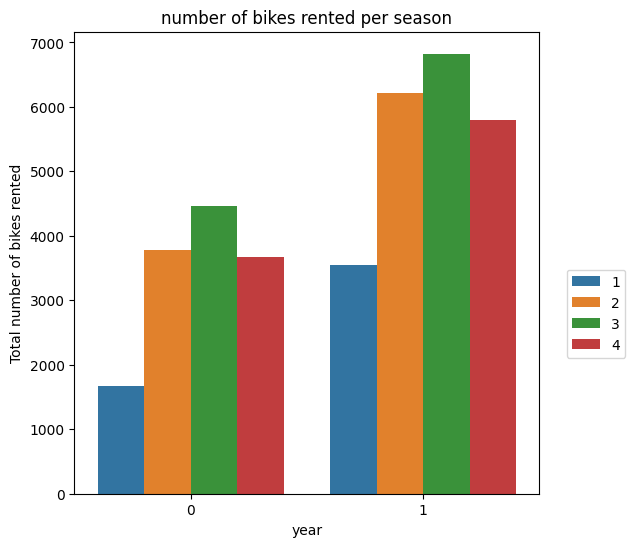

In [5]:
plt.figure(figsize=(6,6))
sns.barplot(x='yr', y='cnt', hue='season', data=data, errorbar=None)

plt.legend(loc='upper right', bbox_to_anchor=(1.2, 0.5))
            
plt.xlabel('year') 
plt.ylabel("Total number of bikes rented")
            
plt.title("number of bikes rented per season")

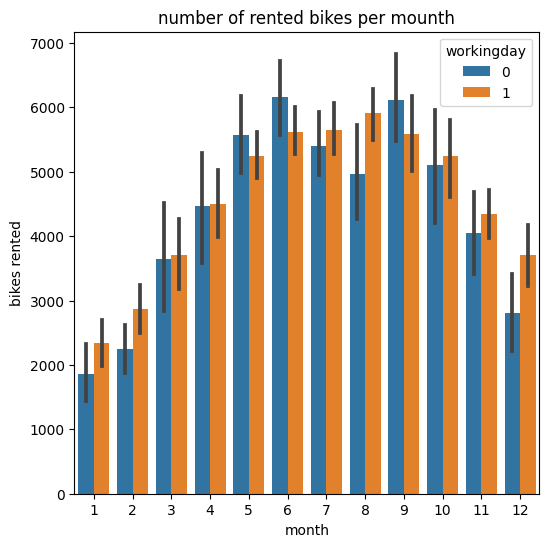

In [6]:
plt.figure(figsize=(6,6))
sns.barplot(x='mnth', y='cnt', hue='workingday', data=data)

plt.xlabel('month')
plt.ylabel('bikes rented')
plt.title("number of rented bikes per mounth")

plt.show()

Text(0.5, 1.0, 'Effect of temperature on rented bikes')

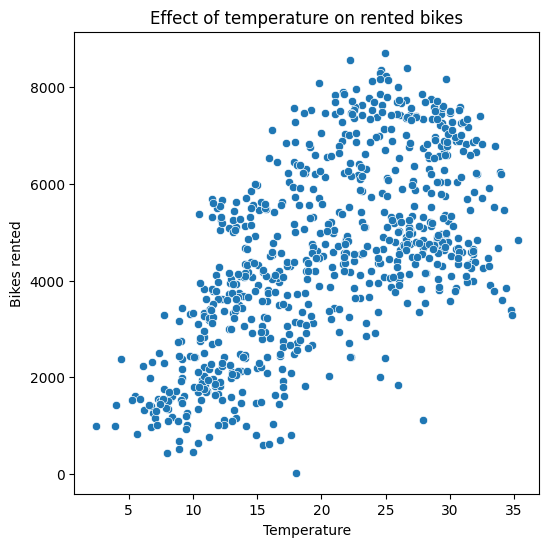

In [7]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='temp', y='cnt', data=data)

plt.xlabel("Temperature")
plt.ylabel("Bikes rented")

plt.title("Effect of temperature on rented bikes")

In [8]:
data = pd.get_dummies(data, columns=['season'])
data.sample(5)

,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_1,season_2,season_3,season_4
instant,,,,,,,,,,,,,,,,,,
666,28-10-2019,1,10,0,0,0,2,19.577500,23.38855,69.4583,26.666536,998,3461,4459,0,0,0,1
317,13-11-2018,0,11,0,0,0,1,18.074153,21.52750,45.8333,18.875307,1004,2713,3717,0,0,0,1
499,14-05-2019,1,5,0,1,1,2,23.506653,27.49500,78.9583,14.250364,342,2501,2843,0,1,0,0
186,05-07-2018,0,7,0,2,1,1,30.613347,34.81690,59.0417,8.459286,1031,3634,4665,0,0,1,0
164,13-06-2018,0,6,0,1,1,1,26.035000,30.08270,49.4583,20.458450,863,4157,5020,0,1,0,0


In [9]:
feature_columns=['registered', 'holiday', 'weekday',
                 'weathersit', 'temp', 'atemp',
                 'season_1', 'season_2', 'season_3',
                 'season_4']
features = data[feature_columns]
target = data[['cnt']]
target

,cnt
instant,
1,985
2,801
3,1349
4,1562
5,1600
...,...
726,2114
727,3095
728,1341


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, x_test, Y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.2)
                                                    

In [12]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float)
Y_train_tensor = torch.tensor(Y_train.values, dtype=torch.float)

x_test_tensor = torch.tensor(x_test.values, dtype=torch.float)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float)

In [13]:
X_train_tensor.shape

torch.Size([584, 10])

In [14]:
y_test_tensor.shape

torch.Size([146, 1])

In [15]:
import torch.utils.data as data_utils

In [16]:
train_data = data_utils.TensorDataset(X_train_tensor, Y_train_tensor)

In [17]:
train_loader = data_utils.DataLoader(train_data, batch_size=100, shuffle=True)

In [18]:
len(train_loader)

6

In [19]:
features_batch, targets_batch = next(iter(train_loader))

In [20]:
features_batch.shape

torch.Size([100, 10])

In [21]:
targets_batch.shape

torch.Size([100, 1])

In [22]:
input_size = X_train_tensor.shape[1]
output_size = 1
hidden_layer_size = 10

In [23]:
loss_fn = torch.nn.MSELoss()

In [24]:
model = torch.nn.Sequential(torch.nn.Linear(input_size, hidden_layer_size),
                            torch.nn.Sigmoid(),
                            torch.nn.Linear(hidden_layer_size, output_size))

/home/ghostoftime111/anaconda3/envs/DP/lib/python3.10/site-packages/hiddenlayer/pytorch_builder.py:82: FutureWarning: 'torch.onnx._patch_torch._node_getitem' is deprecated in version 1.13 and will be removed in version 1.14. Please Internally use '_node_get' in symbolic_helper instead..
  params = {k: torch_node[k] for k in torch_node.attributeNames()}


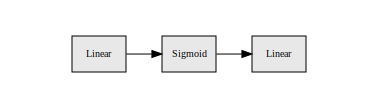

In [25]:
hl.build_graph(model, torch.zeros([hidden_layer_size, input_size])).build_dot()

In [26]:
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [27]:
total_step = len(train_loader)

num_epochs = 10000

for epoch in range(num_epochs + 1):
    for i, (features, target) in enumerate(train_loader):
        
        output = model(features)
        loss = loss_fn(output, target)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        if epoch % 2000 == 0:
            print(f"Epoch [{epoch + 1}]/[{epoch}], Step: {i+1}/{total_step}, Loss: {loss.item():.4f}") 
            

Epoch [1]/[0], Step: 1/6, Loss: 22192600.0000
Epoch [1]/[0], Step: 2/6, Loss: 23835620.0000
Epoch [1]/[0], Step: 3/6, Loss: 23204154.0000
Epoch [1]/[0], Step: 4/6, Loss: 26117954.0000
Epoch [1]/[0], Step: 5/6, Loss: 22848374.0000
Epoch [1]/[0], Step: 6/6, Loss: 25023710.0000
Epoch [2001]/[2000], Step: 1/6, Loss: 21300264.0000
Epoch [2001]/[2000], Step: 2/6, Loss: 22565868.0000
Epoch [2001]/[2000], Step: 3/6, Loss: 25313946.0000
Epoch [2001]/[2000], Step: 4/6, Loss: 23197498.0000
Epoch [2001]/[2000], Step: 5/6, Loss: 22308490.0000
Epoch [2001]/[2000], Step: 6/6, Loss: 23208524.0000
Epoch [4001]/[4000], Step: 1/6, Loss: 23913940.0000
Epoch [4001]/[4000], Step: 2/6, Loss: 20359596.0000
Epoch [4001]/[4000], Step: 3/6, Loss: 20609514.0000
Epoch [4001]/[4000], Step: 4/6, Loss: 19137094.0000
Epoch [4001]/[4000], Step: 5/6, Loss: 25006428.0000
Epoch [4001]/[4000], Step: 6/6, Loss: 24176380.0000
Epoch [6001]/[6000], Step: 1/6, Loss: 23576108.0000
Epoch [6001]/[6000], Step: 2/6, Loss: 18625856.0

In [28]:
model.eval()

with torch.no_grad():
    y_pred = model(x_test_tensor)

In [29]:
sample = x_test.iloc[21]
sample

registered    3488.000000
holiday          0.000000
weekday          1.000000
weathersit       1.000000
temp            18.996653
atemp           22.853350
season_1         0.000000
season_2         0.000000
season_3         0.000000
season_4         1.000000
Name: 297, dtype: float64

In [30]:
sample_tensor = torch.tensor(sample, dtype=torch.float)
sample_tensor

tensor([3.4880e+03, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.8997e+01, 2.2853e+01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00])

In [31]:
with torch.no_grad():
    y_pred = model(sample_tensor)
    
print("Predicted: ", y_pred.item())
print("Actual: ", y_test.iloc[21])

Predicted:  480.260986328125
Actual:  cnt    4187
Name: 297, dtype: int64


In [32]:
with torch.no_grad():
    y_pred_tensor = model(x_test_tensor)

In [33]:
y_pred = y_pred_tensor.detach().numpy()
y_pred.shape

(146, 1)

In [34]:
y_test.values.shape

(146, 1)

In [35]:
compare_df = pd.DataFrame({'actual': np.squeeze(y_test.values), 'predicted': np.squeeze(y_pred)})
compare_df.sample(10)

,actual,predicted
118,5409,480.261017
111,7335,480.261017
1,4748,480.261017
70,5312,480.261017
18,4714,480.261017
48,7765,480.261017
44,6691,480.261017
65,7591,480.261017
77,7504,480.261017
81,7446,480.261017


In [36]:
sklearn.metrics.r2_score(y_test, y_pred)

-4.791610213823479

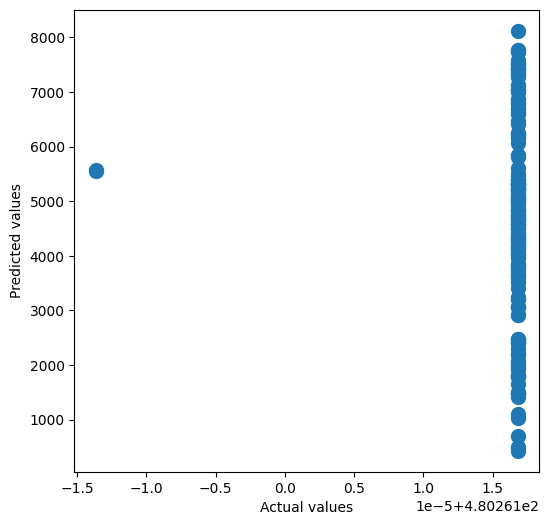

In [37]:
plt.figure(figsize=(6,6))

plt.scatter(y_pred, y_test.values, s=100)

plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.show()